In [2]:
%pylab

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from imfun import fseq, ui

Can't load imreg package, affine and homography registrations won't work


In [4]:
import astromorpho

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/imfun/external/tifffile.py:7261: UserWarning: No module named 'imfun.external._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/imfun/external/czifile.py:146: UserWarning: ImportError: No module named '_czifile'. Decoding of JXR and JPEG encoded images will not be available. Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  warnings.warn(


In [5]:
from scipy import ndimage as ndi

In [6]:
#import visvis as vv

In [7]:
import pickle

In [8]:
import napari

In [9]:
from tqdm.auto import tqdm

In [10]:
#import spimagine as spi

In [11]:
import h5py

In [12]:
import ucats

In [13]:
import visuals as vu

ModuleNotFoundError: No module named 'visuals'

In [17]:
import os

In [14]:
#from skimage.external import tifffile
import tifffile

In [15]:
from skimage import filters as skfilt

In [16]:
from imfun.filt import l1spline, l2spline
from imfun.core import extrema

In [18]:
from importlib import reload

In [19]:
from ucats import masks as umasks

In [20]:
def show_projs(stack):
    ui.group_maps([ucats.clip_outliers(stack.max(axis=i)) for i in range(3)], 
                  figscale=4.5,
                  titles=('XY','XZ', 'YZ'), colorbar=False, imkw=dict(cmap='inferno'))
    tight_layout()
    return gcf()

In [21]:
def rescale_percentiles(img, low=0.5, up=99.5):
    l,h = np.percentile(img, (low,up))
    return np.clip((img-l)/(h-l),0,1)

In [22]:
def crop_to_tuple(crop):
    return tuple((c.start, c.stop) for c in crop)  

In [23]:
def save_resampled_stack(name, stack, attrs):
    out_name = name+'-resampled_stack.h5'
    print('saving to ', out_name)
    f5 = h5py.File(out_name,'w')
    f5.create_dataset('zstack', data=stack)
    dset = f5['zstack']

    f5.attrs['file_path'] = name
    dset.attrs['dims'] = [x.value for x in attrs['dims']]
    dset.attrs['xy_crop'] = crop_to_tuple(attrs['xy_crop'])
    dset.attrs['gain'] = attrs['gain']
    dset.attrs['offset'] = attrs['offset']
    f5.close()

In [53]:
# import itertools as itt
# from skimage import feature as skf

# from tqdm.auto import tqdm

# def hessian_by_dog(img, sigma,mode='nearest'):
#     ndim = np.ndim(img)
#     ax_pairs = itt.combinations_with_replacement(range(ndim),2)
#     sigma = sigma/np.sqrt(2)
#     trunc = 4 # default
#     if sigma*trunc < 4:
#         trunc = 4/sigma
#     def dog(m,k):
#         o = np.zeros(ndim, np.int)
#         o[k] = 1
#         return ndi.gaussian_filter(m, sigma, order=o, truncate=trunc)
#     orders = [(2,0,0), (1,1,0), (1,0,1), (0,2,0), (0,1,1), (0,0,2)]
#     #def dog2(m, o):
#     #    return ndi.gaussian_filter(m, sigma, order=o,truncate=trunc,mode=mode)
        
#     double_dog = lambda axp: dog(dog(img, axp[0]),axp[1])
#     #double_dog = lambda axp: ndi.gaussian_filter1d(ndi.gaussian_filter1d(img, sigma,order=1,axis=axp[0]), 
#     #                                                 sigma,order=1,axis=axp[1])
#     out = [double_dog(axp) for axp in ax_pairs]
#     #out = [dog2(img, o) for o in orders]
#     return out
    
# def hessian_eigen_decomp(H):
#     Hmat = skf.corner._hessian_matrix_image(H)
#     w,v = eigh(Hmat)
#     return w,v

# from imfun import core


# # def mukherjee(img, sigma):
# #     H = hessian_by_dog(img, sigma)
# #     Hmat = skf.corner._hessian_matrix_image(H)
# #     w = eigvalsh(Hmat)
# #     ksort = np.argsort(np.abs(w),axis=-1)
# #     w = take_along_axis(w,ksort,axis=-1)
# #     lam3,lam2,lam1 = [w[...,i] for i in range(3)]
# #     return where((lam2<=0)&(lam3<=0), 
# #                  (lam1-lam2)**2/(np.abs(lam1)*np.abs(lam2-lam3) + 1e-6),
# #                  0)
    

# def sato(img, sigma, gamma12=0.5, gamma23=0.5, alpha=0.25, hessian_variant='dog', mode='nearest'):
#     if hessian_variant.lower() == 'dog':
#         H = hessian_by_dog(img, sigma,mode=mode)
#     elif hessian_variant.lower() == 'gradient_of_smoothed':
#         H = skf.hessian_matrix(img, sigma, mode=mode)
#     else:
#         print('Unknown Hessian variant')
#         return
#     Hmat = skf.corner._hessian_matrix_image(H)
#     w = eigvalsh(Hmat)
#     w = w[...,::-1]
    
#     sh = img.shape
#     out = np.zeros(sh)
    
#     S = (np.sum(w**2,axis=-1))**0.5
#     gamma = np.max(S)/2
#     gamma_sq = 2*gamma**2
    
#     lam1,lam2,lam3 = [w[...,i] for i in range(3)]
    
#     ratio1 = np.where(lam3!=0,lam2/lam3,0)
#     ratio2 = lam1/(1e-6 + np.abs(lam2))
    
#     out = np.where(lam1 < 0, np.abs(lam3)*ratio1**gamma23*(1 + ratio2)**gamma12,
#                 np.where((lam2 < 0) & (lam1 < np.abs(lam2)/alpha), np.abs(lam3)*ratio1**gamma23*(1 - alpha*ratio2)**gamma12,0))
#     #out = out*(1-exp(-S**2/gamma_sq))
#     return out


# def sato2d(img, sigma, gamma12=0.5, alpha=0.25, hessian_variant='gradient_of_smoothed'):
#     if hessian_variant.lower() == 'dog':
#         H = hessian_by_dog(img, sigma)
#     elif hessian_variant.lower() == 'gradient_of_smoothed':
#         H = skf.hessian_matrix(img, sigma)
#     else:
#         print("unknown hessian variant")
#         return
#     Hmat = skf.corner._hessian_matrix_image(H)
#     w = eigvalsh(Hmat)
#     w = w[...,::-1]
    
#     sh = img.shape
#     out = np.zeros(sh)

#     # here lam1 >= lam2
#     lam1,lam2 = [w[...,i] for i in range(2)]
    
#     ratio2 = lam1/(1e-6 + np.abs(lam2))
    
#     out = np.where(lam1 < 0, 
#                    np.abs(lam2)*(1 + ratio2)**gamma12,
#                    np.where((lam2 < 0) & (lam1 < np.abs(lam2)/alpha), np.abs(lam2)*(1 - alpha*ratio2)**gamma12,0))
#     return out               

# def frangi(img, sigma, alpha=0.5, beta=0.5, gamma=None):
#     H = hessian_by_dog(img, sigma)
#     Hmat = skf.corner._hessian_matrix_image(H)
#     w = eigvalsh(Hmat)
#     ksort = np.argsort(np.abs(w),axis=-1)
#     w = take_along_axis(w,ksort,axis=-1)
    
#     sh = img.shape
#     out = np.zeros(sh)
    
#     S = (np.sum(w**2,axis=-1))**0.5
#     if gamma is None:
#         gamma = np.max(S)/2
#         print(gamma)
    
#     alpha_sq = 2*alpha**2
#     beta_sq = 2*beta**2
#     gamma_sq = 2*gamma**2
    
#     for loc in tqdm(list(core.coords.locations(sh))):
#         lam = w[loc]
#         if (lam[1] < 0 and lam[2] < 0):
#             Ra2 = (np.abs(lam[1]/lam[2]))**2
#             Rb2 = (np.abs(lam[0])/(np.abs(lam[1]*lam[2]))**0.5)**2
            
#             out[loc] = (1 - exp(-Ra2/(alpha_sq)))*(1-exp(-S[loc]**2/gamma_sq))*exp(-Rb2/beta_sq)
#     return out
    

# def jerman(img, sigma, tau=0.75):
#     H = hessian_by_dog(img, sigma)
#     #H = skf.hessian_matrix(img, sigma)
#     Hmat = skf.corner._hessian_matrix_image(H)
    
#     #w,v = hessian_eigen_decomp(H)
#     w = eigvalsh(Hmat)
#     # = w[...,::-1]
#     ksort = np.argsort(np.abs(w),axis=-1)
#     w = take_along_axis(w,ksort,axis=-1)
#     sh = img.shape
#     out = np.zeros(sh)
#     min_lam = np.min(w[...,-1])*tau
#     for loc in tqdm(list(core.coords.locations(sh))):
#         lam  = w[loc][::-1]
#         lam_p = lam[-1] if lam[-1] < min_lam else min_lam
#         if lam[2] > 0 and lam[2] > 0:
#             out[loc] = 0
#         elif lam[1] <= lam_p/2:
#             out[loc] = 1
#         else:
#             out[loc] = lam[1]**2*(lam_p-lam[1])*(3/(lam[1]+lam_p))**3
#     return out

In [24]:
from skimage import filters as skfilters
def make_local_mask(img, plow=75, phigh=95, window_size=100, min_obj_size=10, verbose=True):
    squares = ucats.patches.make_grid(img.shape, window_size, window_size-window_size//4)
    print(len(squares))
    mask = np.zeros(img.shape, np.int)
    counts = np.zeros(img.shape, np.int)
    for sq in tqdm(squares, desc='thresholding for somata ROIs', disable=not verbose):
        #m =  img[sq] > np.percentile(img[sq],p)
        th1,th2 = np.percentile(img[sq], (plow,phigh))
        m = skfilters.apply_hysteresis_threshold(img[sq], th1, th2)
        if verbose>1:
            print(sq,th1,th2,np.any(m))
        #macwe = morphsnakes.MorphACWE(img[sq],lambda1=2,levelset=m)
        #macwe.run(macwe_iters,verbose=False)
        #mask[sq] += macwe.levelset.astype(bool)
        mask[sq] += m
        counts[sq] += 1
    mask = mask/(1e-5 + counts)
    mask[counts == 0] = 0
    print(mask.max())
    #return mask
    mask = mask > 0.5
    return ucats.masks.threshold_object_size(mask, min_obj_size) 

In [25]:
#data_path = '/home/data/Semyanov/Astrocyte-Morphology/HFD 2020/3D sholl'
#data_path = '/media/brazhe/Extreme SSD/data/Astrocyte-Morphology/HFD 2020/3D sholl'
# data_path = '/media/brazhe/sandisk2Tb/data/semlab/Astrocyte-Morphology/HFD 2020/3D sholl'
data_path = '/home/levtg/astro-morpho/data/'

In [26]:
cd $data_path

/home/levtg/astro-morpho/data


In [27]:
ls --color=never

1wk-both1-grn-raw.pic            3wk-ly2-raw.pic
1wk-both1-grn-raw.pic-fproj.png  3wk-ly2-raw.pic-fproj.png
1wk-both1-red-raw.pic            3wk-ly3-raw.pic
1wk-both1-red-raw.pic-fproj.png  3wk-ly3-raw.pic-fproj.png
1wk-both4-grn-raw.pic            3wk-ly4-raw.pic
1wk-both4-grn-raw.pic-fproj.png  3wk-ly4-raw.pic-fproj.png
1wk-both4-red-raw.pic            3wk-ly5-raw.pic
1wk-both4-red-raw.pic-fproj.png  3wk-ly5-raw.pic-fproj.png
1wk-both5-grn-raw.pic            3wk-ly6-raw.pic
1wk-both5-grn-raw.pic-fproj.png  3wk-ly6-raw.pic-fproj.png
1wk-both5hm-grn-raw.pic          3wk-ly7-raw.pic
1wk-both5hm-red-raw.pic          3wk-ly7-raw.pic-fproj.png
1wk-both5-red-raw.pic            3wk-ly8-raw.pic
1wk-both5-red-raw.pic-fproj.png  3wk-ly8-raw.pic-fproj.png
1wk-both7-grn-raw.pic            3wk-ly9-raw.pic
1wk-both7-grn-raw.pic-fproj.png  3wk-ly9-raw.pic-fproj.png
1wk-both7-red-raw.pic            4wk-both1-grn-raw.pic
1wk-both7-red-raw.pic-fproj.png  4wk-both1-grn-raw.pic-fproj.png
1wk-both8-grn-ra

In [58]:
all_czi = !find . -iname '*.czi'

In [59]:
all_czi = sorted(all_czi)

In [60]:
all_czi

['./WD3/1 Sholl for .czi',
 './WD4/WD4m4_1.czi',
 './WD5/WD3m5.czi',
 './WD6/WD3m6.czi',
 './WD7/WD3m7.czi',
 './WD8/WD3m8.czi',
 './WD9/WD3m9.czi']

In [61]:
for n in all_czi:
    print(n, astromorpho.io.file_info(n)['dim'])

./WD3/1 Sholl for .czi [1 um, 0.35171803 um, 0.35171803 um]
./WD4/WD4m4_1.czi [1 um, 0.34844677 um, 0.34844677 um]
./WD5/WD3m5.czi [1 um, 0.41513291 um, 0.41513291 um]
./WD6/WD3m6.czi [1 um, 0.34844677 um, 0.34844677 um]
./WD7/WD3m7.czi [1 um, 0.34844677 um, 0.34844677 um]
./WD8/WD3m8.czi [1 um, 0.35171803 um, 0.35171803 um]
./WD9/WD3m9.czi [1 um, 0.35171803 um, 0.35171803 um]


In [62]:
avg_xy_scale = np.mean([astromorpho.io.file_info(n)['dim'][1] for n in tqdm(all_czi[:-2])])
avg_xy_scale

  0%|          | 0/5 [00:00<?, ?it/s]

0.36243825 um

In [63]:
xy_scales = [astromorpho.io.load_stack(n)[1][1] for n in all_czi]

In [64]:
ch = -1

In [65]:
zmax_projections = [astromorpho.io.load_stack(n)[0][ch].max(axis=0) for n in all_czi]

In [66]:
xmax_projections = [astromorpho.io.load_stack(n)[0][ch].max(axis=1) for n in all_czi]

In [67]:
ymax_projections = [astromorpho.io.load_stack(n)[0][ch].max(axis=2) for n in all_czi]

In [68]:
#astromorpho.io.load_stack(all_czi[0])[0].dtype

In [69]:
x = xy_scales[0]

In [70]:
x.value

0.35171803246520866

In [71]:
#os.path.basename(all_czi[2])

In [72]:
close('all')

In [73]:
saturated_level = 2**16-1

In [74]:
import os

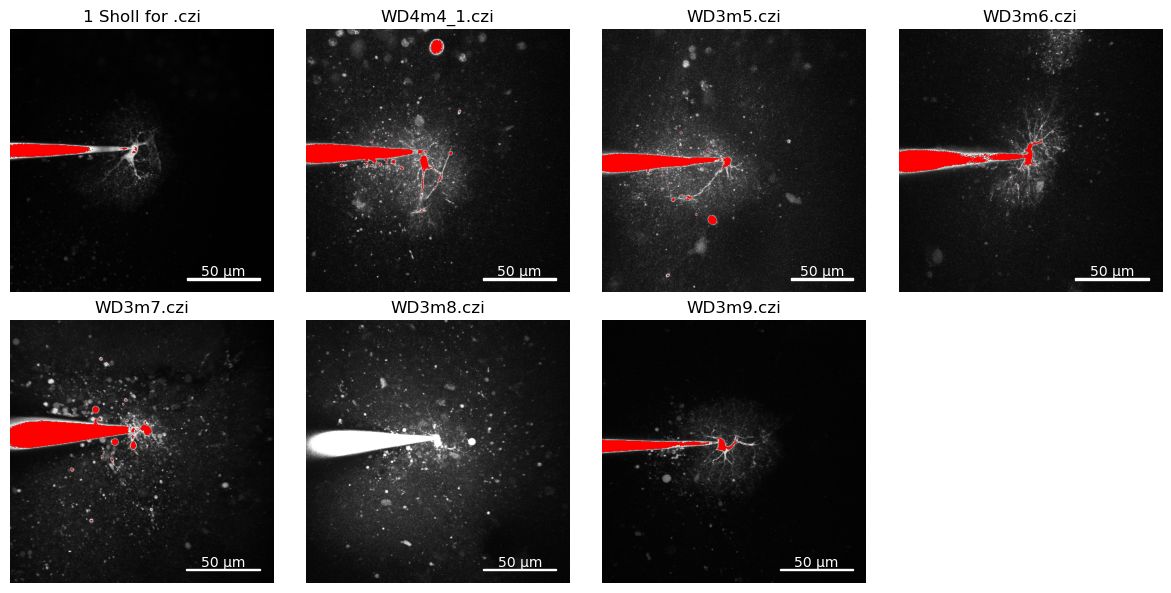

In [75]:
ui.group_maps(zmax_projections, samerange=False, imkw=dict(cmap='gray'),
              titles=[os.path.basename(n) for n in all_czi],
              figscale=3)
f = gcf()

for ax,sc,p in zip(f.axes,xy_scales,zmax_projections):
    vu.add_scalebar(ax,50,scale=sc.value)
    
    mask = p >= saturated_level
    z = np.zeros_like(mask)
    ax.imshow(dstack([mask,z,z,mask]).astype(float32))

    
tight_layout()
savefig(f'saturated_pixels_Z_projections-channel={ch}.png')
gcf()

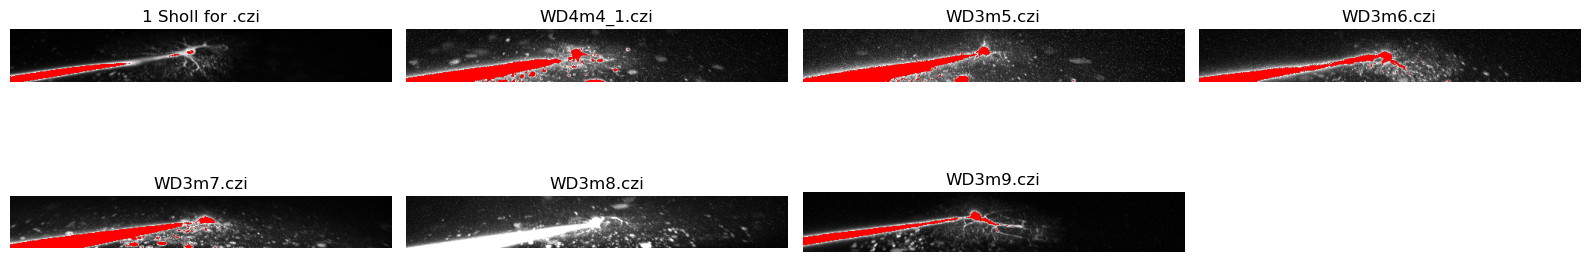

In [76]:
ui.group_maps(xmax_projections, samerange=False, 
              titles=[os.path.basename(n) for n in all_czi],
              imkw=dict(cmap='gray',aspect='auto'), figsize=(16,4))

f = gcf()

for ax,p in zip(f.axes,xmax_projections):
    
    mask = p >= saturated_level
    z = np.zeros_like(mask)
    ax.imshow(dstack([mask,z,z,mask]).astype(float32))

tight_layout()
savefig(f'saturated_pixels_X_projections-channel={ch}.png')

gcf()

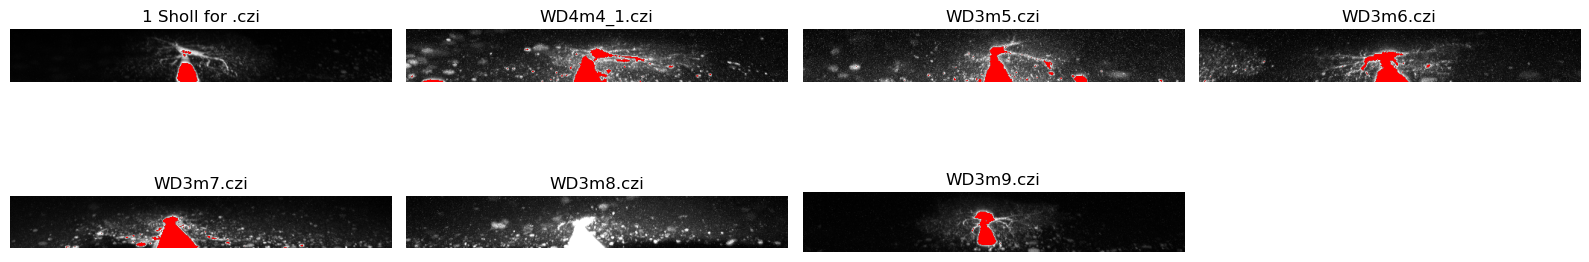

In [77]:
ui.group_maps(ymax_projections, samerange=False, 
              titles=[os.path.basename(n) for n in all_czi],
              imkw=dict(cmap='gray',aspect='auto'), figsize=(16,4))

f = gcf()

for ax,p in zip(f.axes,ymax_projections):
    
    mask = p >= saturated_level
    z = np.zeros_like(mask)
    ax.imshow(dstack([mask,z,z,mask]).astype(float32))

tight_layout()
savefig(f'saturated_pixels_Y_projections-channel={ch}.png')

gcf()

In [78]:
close('all')

In [79]:
#from skimage.external import tifffile
import tifffile

In [80]:
close('all')

In [81]:
all_czi[-5:]

['./WD5/WD3m5.czi',
 './WD6/WD3m6.czi',
 './WD7/WD3m7.czi',
 './WD8/WD3m8.czi',
 './WD9/WD3m9.czi']

In [ ]:
saturated_level = 2**16-1
metadata = []

data_params = {name_:dict() for name_ in all_czi}

for n in tqdm(all_czi):    
    stack,dims = astromorpho.io.load_stack(n)
    for ch in [-1]:
        tifffile.imsave(n+f'-saturated-ch={ch}.tiff', 
                        255*(stack[ch]==saturated_level).astype(uint8), compress=3)
        
        gain, offset = ucats.estimate_gain_and_offset(stack[ch],with_plot=True,ntries=500)
        savefig(n+f'-gain-offset-ch={ch}.png')
        close('all')
        
        go_list = array([ucats.estimate_gain_and_offset(stack[ch],with_plot=False) for i in range(10)])
        gain,offset = go_list.mean(axis=0)
        
        params = dict()
        params['name'] = n
        params['channel'] = ch
        params['zscale'] = dims[0]
        params['xyscale'] = dims[1]
        params['gain'] = gain
        params['offset'] = offset
        

        data_params[n]['dims']=dims
        data_params[n]['z_zoom']=dims[0]/dims[1]
        data_params[n]['gain'] = gain
        data_params[n]['offset'] = offset
        data_params[n]['xy_crop'] = (slice(100,512-100),slice(100, 512-100))
        stack_z = (stack[-1]-data_params[n]['offset'])/data_params[n]['gain']
        minv,maxv = max(0,np.min(stack_z)),np.max(stack_z)
        
        stack_z = ndi.zoom(stack_z[(slice(None),) + data_params[n]['xy_crop']], (data_params[n]['z_zoom'], 1, 1))
        stack_z = clip(stack_z, minv, maxv)
        
        f = show_projs(stack_z)
        savefig(n+'-max-projections.png')
        
        save_resampled_stack(n, stack_z, data_params[n])
        
        tifffile.imsave(n+f'-gain-offset-rescaled-ch={ch}.tiff', 
                        ((stack[ch]-offset)/gain).astype(float32), compress=3)
        metadata.append(params)
        close(n)

In [82]:
import pandas as pd

In [ ]:
metadata_df = pd.DataFrame(metadata)

In [65]:
all_czi

['./WD3/1 Sholl for .czi',
 './WD4/WD4m4_1.czi',
 './WD5/WD3m5.czi',
 './WD6/WD3m6.czi',
 './WD7/WD3m7.czi',
 './WD8/WD3m8.czi',
 './WD9/WD3m9.czi']

In [66]:
len(all_czi)

7

In [67]:
# for name in all_czi:
#     stack, dims = astromorpho.io.load_stack(name)
#     data_params[name]['dims']=dims
#     data_params[name]['z_zoom']=dims[0
    
#     #print(stack.shape, dims, data_params[name]['z_zoom'])
    

In [68]:
name = all_czi[1]
name

'./WD4/WD4m4_1.czi'

In [69]:
stack, dims = astromorpho.io.load_stack(name)
#data_params[name]['dims']=dims
#data_params[name]['z_zoom']=dims[0]/dims[1]
print(stack.shape, dims, data_params[name]['z_zoom'])

/home/brazhe/proj/image-funcut/imfun/external/czifile.py:408: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[index] = tile


(3, 70, 512, 512) [1 um, 0.34844677 um, 0.34844677 um] 2.8698788268222573


In [70]:
#gain, offset = ucats.estimate_gain_and_offset(stack[-1],with_plot=True)
#gcf()

In [71]:
#data_params[name]['gain'] = gain
#data_params[name]['offset'] = offset


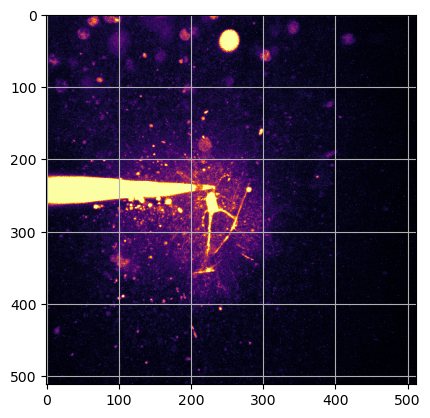

In [73]:
figure()
imshow(ucats.clip_outliers(stack[-1].max(0),phigh=98),cmap='inferno')
grid(True)
gcf()

In [74]:
#data_params[name]['dims'][1].value = 0.5
#data_params[name]['dims'][2].value = 0.5
#dims = data_params[name]['dims']
#data_params[name]['z_zoom']=dims[0]/dims[1]

In [75]:
fs = fseq.from_array(stack[-1])
fs.meta['axes'] = data_params[name]['dims']

ui.Picker(fs).start()

(<AxesSubplot:xlabel='um', ylabel='um'>,
 <imfun.ui.Picker_.Picker at 0x7f2570030160>)

In [ ]:
#data_params[name]['xy_crop'] = (slice(140,350),slice(160, 370))
data_params[name]['xy_crop'] = (slice(100,512-100),slice(100, 512-100))

In [ ]:
stack_z = (stack[-1]-data_params[name]['offset'])/data_params[name]['gain']
minv,maxv = max(0,np.min(stack_z)),np.max(stack_z)

In [ ]:
%time stack_z = ndi.zoom(stack_z[(slice(None),)+data_params[name]['xy_crop']], (data_params[name]['z_zoom'], 1, 1))
stack_z = clip(stack_z, minv, maxv)

In [ ]:
stack_z.min()

In [ ]:
stack_z = stack_z.astype(float64) # for napari

In [319]:
[stack[-1].max(axis=i).shape for i in range(3)]

[(512, 512), (80, 512), (80, 512)]

In [320]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [321]:
close('all')

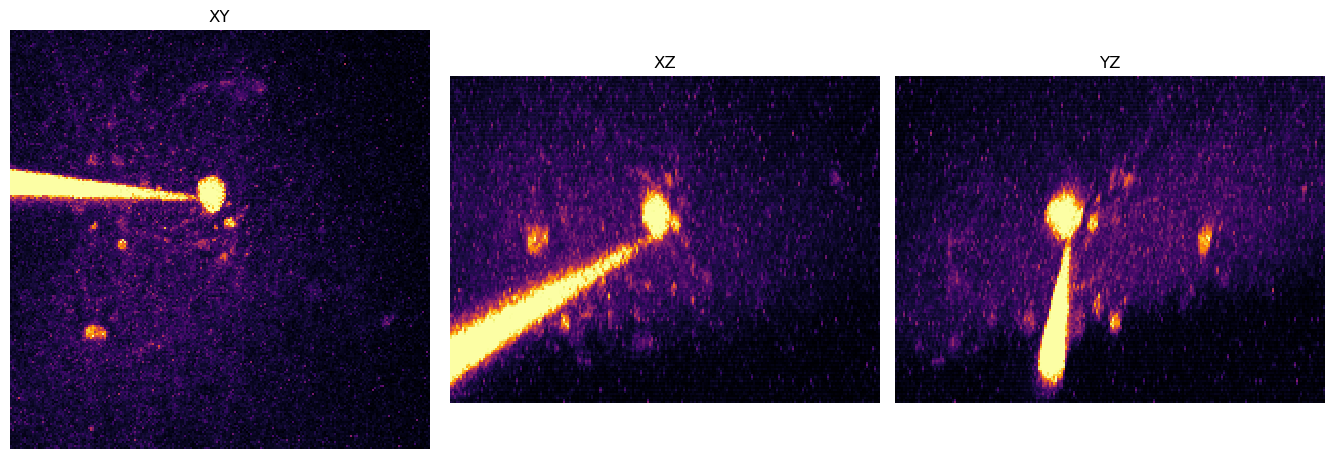

In [322]:
f = show_projs(stack_z)
savefig(name+'-max-projections.png')
f

In [323]:
napari.view_image(stack_z)

In [324]:
save_resampled_stack(name, stack_z, data_params[name])

saving to  ./9M mice/8 ctrl new/C 2 Image 3.czi-resampled_stack.h5


In [43]:
close('all')

## Inpainting of oversaturated values

In [83]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [35]:
name = all_czi[5]

In [76]:
from imfun.filt import l1spline, l2spline 

def inpaint_oversaturated_iters(stack, niters=50,smooth=1.5, smoother=l2spline, overshoot=1.5,sat_level=2**16-1):
    
    sat_pixels = stack >= sat_level
    stack = np.copy(stack).astype(float32)
    
    sat_pixels2 = ndi.binary_opening(sat_pixels)
    boundary_pixels = (sat_pixels*sat_pixels2)
    stack[boundary_pixels] = stack[boundary_pixels] - 1
    stackx = where(sat_pixels2, overshoot*stack, stack)
    vacc = []
    for i in tqdm(range(niters)):
        interp_stack = np.array([smoother(f, smooth) for f in (stackx)])
        #v_inp = interp_stack[:,loc[0],loc[1]]
        #vacc.append(v_inp)
        stackx = np.maximum(stack, where(sat_pixels, interp_stack, stackx))
    return stackx,vacc

def inpaint_oversaturated_weights(stack, smooth=1.5, sat_level=2**16-1):
    
    sat_pixels = stack >= sat_level
    sat_core = ndi.binary_opening(sat_pixels)
    boundary_pixels = (sat_pixels*sat_core)
    
    stack = np.copy(stack).astype(float32)
    stack[boundary_pixels] = stack[boundary_pixels] - 1
    
    #interp_stack = l2spline(stack, smooth, weights=1-sat_core)
    interp_stack = array([l2spline(f, smooth, weights=clip((1-m),0.0,1)) for f,m in zip(stack, sat_core)])
    rec_stack = where(sat_core, interp_stack, stack)
    return rec_stack
    

In [37]:
stack, dims = astromorpho.io.load_stack(name)

In [38]:
stack.shape

(3, 70, 512, 512)

In [39]:
ch = 2
sat_suff = f'-saturated-ch={ch}.tiff'

In [40]:
stack_z = stack[-1]

In [41]:
%time inpainted_w = inpaint_oversaturated_weights(stack_z)

CPU times: user 1.13 s, sys: 143 ms, total: 1.28 s
Wall time: 1.28 s


In [42]:
%time inpainted_i,vacc  = inpaint_oversaturated_iters(stack_z,niters=100)


CPU times: user 1min 1s, sys: 15.7 s, total: 1min 17s
Wall time: 1min 16s


In [43]:
#loc = (248, 237)`
#loc = (295, 253)
loc = (286, 246)

In [44]:
v = stack[-1][:,loc[0],loc[1]]
v_inp_w = inpainted_w[:,loc[0],loc[1]]
v_inp_i = inpainted_i[:,loc[0],loc[1]]

#v_rec_L1 = rec_stack_L1[:,loc[0],loc[1]]
#v_rec_L2 = rec_stack_L2[:,loc[0],loc[1]]
#v_inp = inpainted[:,loc[0],loc[1]]

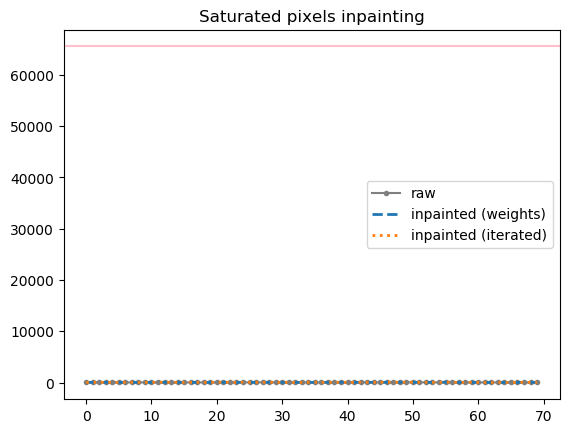

In [45]:
fh = figure()
title("Saturated pixels inpainting")
axhline(2**16-1, color='pink')
plot(v, '.-', color='gray',label='raw')
#for v_ in vacc:
#    plot(v_,lw=0.5,color='gray',alpha=0.6)
plot(v_inp_w, label='inpainted (weights)',ls='--',lw=2)
plot(v_inp_i, label='inpainted (iterated)',ls=':',lw=2)

#plot(v_rec_L1, label='inpaint',lw=2,ls='--')
legend()
fh

In [46]:
close('all')

### Correcting for saturation and converting to photon counts

In [50]:
saturated_level = 2**16-1
metadata = []
for n in tqdm(all_czi[6:]):    
    stack,dims = astromorpho.io.load_stack(n)
    #ch = -1
    for ch in list(range(stack.shape[0])):
        tifffile.imsave(n+f'-saturated-ch={ch}.tiff', 
                        255*(stack[ch]==saturated_level).astype(uint8), compress=3)
        
        #gain, offset = ucats.estimate_gain_and_offset(stack[ch],with_plot=True)
        #savefig(n+f'-gain-offset-ch={ch}.png')
        
        go_list = array([ucats.estimate_gain_and_offset(stack[ch],with_plot=False) for i in range(5)])
        gain,offset = go_list.mean(axis=0)
        
        close('all')
     
        params = dict()
        params['name'] = n
        params['channel'] = ch
        params['zscale'] = dims[0]
        params['xyscale'] = dims[1]
        params['gain'] = gain
        params['offset'] = offset
        
        inpainted = inpaint_oversaturated_weights(stack[ch])
        pmt_stack = (inpainted-offset)/gain
        
        
        tifffile.imsave(n+f'-photon-rescaled-saturation-corrected-ch={ch}.tiff', 
                        (pmt_stack).astype(float32), compress=3)
        metadata.append(params)
        

/home/brazhe/proj/image-funcut/imfun/external/czifile.py:408: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[index] = tile


In [ ]:
df = pd.DataFrame(metadata, columns = ['name','channel','xyscale','zscale','gain','offset'])

In [ ]:
df

In [ ]:
df.to_excel('ht_project_metadata_collection.xls')

--------------------------

In [ ]:
#from skimage import filters as skfilters

In [ ]:
#stack_z_ansc = ucats.Anscombe.transform(stack_z)

-------------------
## Segmenting the pipette

In [38]:
def st_roll(arr):
    return moveaxis(arr, 2, 0)

In [39]:
def find_kink(v,pre_smooth=1.5):
    vs = l2spline(v,pre_smooth) if pre_smooth > 0 else v
    eout = extrema.extrema2(vs, refine=False)
    xfit,yfit = eout[0]
    #maxima,minima = [np.array(a) for a in eout[1]]
    minima = extrema.locextr(vs, output='min',refine=False)
    minima = np.array(minima)[:,0]
    
    gups,gdowns = [np.array(a) for a in eout[2]]
    print(gups[0])
    kink = np.max(minima[minima<=gups[0]+1])+1
    return int(round(kink))



def make_sato_mask(stack, sigmas=logspace(2,3,5,base=2), phigh=99.9, **kwargs):
    out_sato = np.max([sato(stack,s,**kwargs)*s**2 for s in tqdm(sigmas)],0).astype(float64)
    th_low_s, th_high_s = np.percentile(out_sato[out_sato>0], (99, phigh))
    print('thresholds', th_low_s, th_high_s/2, th_high_s)
    sato_mask = ucats.masks.largest_region(skfilt.apply_hysteresis_threshold(out_sato, th_high_s/2, th_high_s))
    return sato_mask

def make_simple_mask(stack):
    stack_rolled = np.moveaxis(stack, 2,0)
    th_low, th_high = np.percentile(stack, (99, 99.5))
    masks = np.array([ucats.masks.refine_mask_by_percentile_filter(skfilt.apply_hysteresis_threshold(p, th_low, th_high),with_cleanup=True,min_obj_size=16) 
                  for p in stack_rolled])
    return np.moveaxis(masks,0,2)
    
def combine_masks(stack,simple_mask,sato_mask):
    sato_m = st_roll(sato_mask)
    simple_m = st_roll(simple_mask)
    stack_rolled = st_roll(stack)
    masks3 = array([(m*(plane >= 0.25*np.mean(plane[m_s]))) if np.any(m_s) else zeros(plane.shape, np.bool) 
                    for m,plane,m_s in zip(simple_m, stack_rolled, sato_m)])
    masks3 = ucats.masks.select_overlapping(masks3,sato_m)
    return ucats.masks.largest_region(masks3)


In [34]:
all_czi

['./WD3/1 Sholl for .czi',
 './WD4/WD4m4_1.czi',
 './WD5/WD3m5.czi',
 './WD6/WD3m6.czi',
 './WD7/WD3m7.czi',
 './WD8/WD3m8.czi',
 './WD9/WD3m9.czi']

In [35]:
len(all_czi)

7

In [88]:
name = all_czi[0]
name

'./WD3/1 Sholl for .czi'

In [89]:
suff =  '-resampled_stack.h5'
suff_cedf = '-ansc-cedf-filtered-th=5.0.tiff'

pip_suff = '-pipette-mask.tiff'

In [90]:
f5 = h5py.File(name+suff, 'r')
stack_z = asarray(f5['zstack'])

In [91]:
f5['zstack'].attrs.keys()

<KeysViewHDF5 ['dims', 'gain', 'offset', 'xy_crop']>

In [92]:
napari.view_image(stack_z,ndisplay=3)

In [93]:
simple_mask = make_simple_mask(stack_z)

In [94]:
sato_mask = make_sato_mask(stack_z)

/scratch/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in sqrt
/scratch/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in sqrt



thresholds 0.024603120022403436 0.0965261932625984 0.1930523865251968


In [95]:
#napari.view_image(simple_mask,rendering='iso',ndisplay=3)

In [96]:
masks3 = combine_masks(stack_z, simple_mask, sato_mask)

In [97]:
vx = masks3.sum(axis=(1,2))
vx_sato = st_roll(sato_mask).sum(axis=(1,2))

In [98]:
kink = len(vx)

124


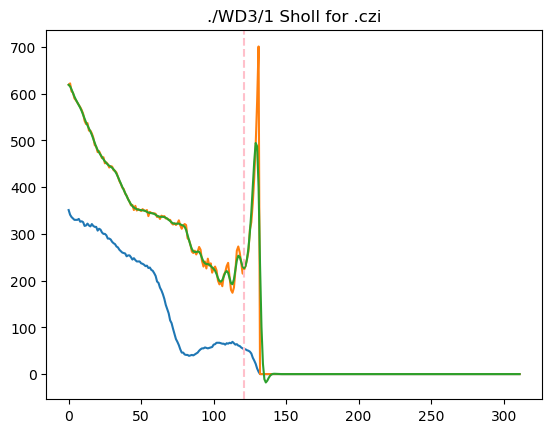

In [99]:
figure();
plot(vx_sato)


#plot(masks2.sum(axis=(1,2)))
#vx_s = st_roll(sato_mask).sum(axis=(1,2))

plot(vx)
plot(l2spline(vx,1.5))
try:
    kink = find_kink(vx)
except :
    #print(E)
    kink = len(vx)

axvline(kink,color='pink',ls='--')


title(name)
gcf()

In [100]:
masks3a = masks3.copy()
masks3a[kink:]=0
masks3a = ucats.masks.largest_region(masks3a)

In [101]:
#ui.Picker(vu.arrays_to_fstackcoll(masks3, *[st_roll(a) for a in (stack_z, sato_mask)])).start()

In [102]:
w = napari.view_image(masks3,rendering='iso',ndisplay=3,colormap='magenta')
w.add_image(masks3a,rendering='iso',colormap='red')
#w.add_image(st_roll(sato_mask),rendering='iso',colormap='green')

<Image layer 'masks3a' at 0x7fa9a2cf4dd0>

In [103]:
close('all')

In [104]:
## ------------------
use_kink = True
## ------------------

In [105]:
masks3_final = masks3a if use_kink else masks3
masks3_final = np.moveaxis(masks3_final,0,2) 

In [106]:
tifffile.imsave(name+pip_suff,255*masks3_final.astype(int),compress=3)

In [107]:
show_stack = (stack_z*(~(ndi.binary_dilation(masks3_final,iterations=3)))).astype(float64)

In [108]:
napari.view_image(show_stack, ndisplay=3)

In [62]:
#import spimagine as spim

In [63]:
#spim.volshow(show_stack)

INFO:spimagine.gui.glwidget | saving frame as /media/brazhe/Extreme SSD/data/Astrocyte-Morphology/astro_with_EF6.png
INFO:spimagine.gui.glwidget | saving frame as /media/brazhe/Extreme SSD/data/Astrocyte-Morphology/astro_with_EF6a.png
INFO:spimagine.gui.glwidget | saving frame as /media/brazhe/Extreme SSD/data/Astrocyte-Morphology/astro_with_EF7.png


In [109]:
f5.close()

## Построение бинарных масок для отростков

In [84]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [85]:
suff =  '-resampled_stack.h5'
#suff_cedf_ansc = '-ansc-cedf-filtered-th={:1.1f}.tiff'
suff_cedf_ansc = '-ansc-cedf-filtered.h5'
#suff_cedf_ansc = '-ansc-cedf-filtered.tiff'
pip_suff = '-pipette-mask.tiff'

In [86]:
sigmas = logspace(0, log2(3), 10, base=2)
sigmas

array([1.        , 1.12983096, 1.27651801, 1.44224957, 1.62949822,
       1.84105755, 2.08008382, 2.35014311, 2.65526446, 3.        ])

In [87]:
# %%time 

# sato_masks = {}
# for n in tqdm(all_czi):
#     pipette = tifffile.imread(n + pip_suff) > 0
#     anti_pipette = ~ndi.binary_dilation(pipette, iterations=4)
#     f5c = h5py.File(n+suff+suff_cedf_ansc,'r')
#     xstack = array(f5c['cedf'],dtype=float64)*(anti_pipette)
#     ns = ucats.mad_std(xstack[xstack>0])
#     #ns = ucats.mad_std(xstack)
#     sm = make_sato_mask(ndi.median_filter(xstack,3)*(xstack>0) + 0.001*ns*randn(*xstack.shape), sigmas=sigmas, phigh=95).astype(int)
#     sato_masks[n] = sm
#     print(n, 'noise_sigma:',ns, 1.5*ns, 3*ns)

In [88]:
#pickle.dump(sato_masks, open('sato-masks2.pickle','wb'))
#sato_masks2 = pickle.load(open('sato-masks2.pickle','rb'))

In [89]:
name = all_czi[3]
name

'./WD6/WD3m6.czi'

In [90]:
pipette = tifffile.imread(name + pip_suff) > 0

In [91]:
anti_pipette = ~ndi.binary_dilation(pipette, iterations=4)

In [92]:
close('all')

In [93]:
f5 = h5py.File(name + suff, 'r')
stack = array(f5['zstack'])
xy_crop = tuple(slice(*c) for c in f5['zstack'].attrs['xy_crop'])
f5.close()

In [94]:
w = napari.view_image(stack)
w.add_image(pipette, colormap='red', blending='additive')

<Image layer 'pipette' at 0x7febbb9d8280>

In [50]:
#xy_crop

In [51]:
#raw_stack, dims = astromorpho.io.load_stack(name)
#raw_stack = raw_stack[-1][(slice(None),)+xy_crop]

In [52]:
#raw_stack = ndi.zoom(raw_stack, (dims[0]/dims[1],1,1))

In [53]:
#raw_stack.shape, stack.shape

In [54]:
#ui.Picker(vu.arrays_to_fstackcoll(raw_stack, stack)).start()

In [95]:
#cedf = tifffile.imread(name + suff +  suff_cedf_ansc.format(1))*(~pipette)
#cedf = tifffile.imread(name + suff +  suff_cedf.format(5))*(~pipette)
f5c = h5py.File(name+suff+suff_cedf_ansc,'r')

In [96]:
f5c.keys()

<KeysViewHDF5 ['1', '1.5', '3', '5', 'cedf']>

In [97]:
xstack = array(f5c['cedf'],dtype=float64)*(anti_pipette)

In [98]:
xstack = clip(xstack, 0, xstack.max())

In [100]:
napari.view_image(xstack)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 155.5, 155.5), zoom=3.1088141025641023, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 201.0, 1.0), (0.0, 312.0, 1.0), (0.0, 312.0, 1.0)), current_step=(100, 156, 156), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'xstack' at 0x7febba1e8c10>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ]), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, s

In [64]:
noise_sigma = ucats.utils.mad_std(xstack[xstack>0])

In [65]:
noise_sigma, 1.5*noise_sigma, 3.3*noise_sigma

(0.22787752223163843, 0.3418162833474576, 0.7519958233644067)

In [61]:
#xstackf = array([ucats.utils.adaptive_filter_2d(f,keep_clusters=True) for f in xstack])
%time xstackf = ndi.median_filter(xstack,3)
%time xstackf_hp = xstackf-l1spline(xstackf,5) # was 11; takes some time

CPU times: user 4.29 s, sys: 15.9 ms, total: 4.31 s
Wall time: 4.31 s


/home/brazhe/opt/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


CPU times: user 1min 11s, sys: 49.2 s, total: 2min
Wall time: 1min 10s


In [62]:
wx = napari.view_image(xstack)
wx.add_image(xstackf_hp)

<Image layer 'xstackf_hp' at 0x7f42d0206ac0>

In [63]:
maskx = np.sum([array(f5c[k]) for k in ['1','1.5','3','5']],0)*anti_pipette

In [64]:
maskx2 = np.array([umasks.refine_mask_by_percentile_filter(f,with_cleanup=True,min_obj_size=9) 
                   for f in skfilt.apply_hysteresis_threshold(maskx, 0.99, 1.5)]).astype(int)
#maskx2 = ucats.masks.threshold_object_size(maskx>1.5,100).astype(int)

In [65]:
seed_mask = umasks.largest_region(array(f5c['5']*anti_pipette)>0.75)
seed_mask2 = (seed_mask + umasks.largest_region(umasks.select_overlapping(array(f5c['3']*anti_pipette)>0.85,seed_mask))).astype(bool)
seed_mask3 = (seed_mask2 + umasks.largest_region(umasks.select_overlapping(array(f5c['1.5']*anti_pipette)>0.95,seed_mask2))).astype(bool)

In [66]:
w = napari.view_image(xstackf_hp,ndisplay=3)
w.add_image(maskx2, colormap='cyan', blending='additive')
w.add_image(seed_mask3, colormap='magenta', blending='additive')

<Image layer 'seed_mask3' at 0x7f42bb95ac40>

In [67]:
%time cedf_mask = array([umasks.threshold_object_size(skfilt.apply_hysteresis_threshold(f, 1*noise_sigma, 3*noise_sigma), 9) for f in xstackf_hp])
cedf_mask = umasks.threshold_object_size(cedf_mask, 100)
cedf_mask_s = umasks.select_overlapping(cedf_mask, seed_mask)
#%time cedf_mask = make_local_mask(maximum(0,xstack-l2spline(xstack,15)),plow=95, phigh=99,window_size=25)

CPU times: user 635 ms, sys: 223 ms, total: 858 ms
Wall time: 588 ms


In [68]:
w2 = napari.view_image(seed_mask3,ndisplay=3)
w2.add_image(cedf_mask)
w2.add_image(cedf_mask_s)

<Image layer 'cedf_mask_s' at 0x7f42b44c2a60>

In [69]:
close('all')

In [190]:
ui.Picker(vu.arrays_to_fstackcoll(cedf_mask.astype(int), xstackf, xstackf_hp, maskx2)).start()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa9a3cc3250>,
 <imfun.ui.Picker_.Picker at 0x7fa9a3cbdd10>)

In [191]:
tifffile.imsave(name+suff+'-cedf.tiff', xstack.astype(float32),compress=3)
tifffile.imsave(name+suff+'-cedf-mask.tiff', 255*cedf_mask.astype(int8),compress=3)
tifffile.imsave(name+suff+'-cedf-mask_s.tiff', 255*cedf_mask_s.astype(int8),compress=3)

In [192]:
name+suff

'./WD4/WD4m4_1.czi-resampled_stack.h5'

## HOSVD denoising interlude

In [39]:
import ucats

In [40]:
reload(ucats.decomposition)

<module 'ucats.decomposition' from '/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/ucats/decomposition.py'>

In [45]:
def denoise_stack(stack, twicing_iters=1, twicing_alpha=0.5, 
                  patch_ssize = 32,
                  patch_tsize=None,
                  coef_threshold=25,
                  verbose=1):

    denoised = np.copy(stack)
    
    if patch_tsize is None:
        patch_tsize = patch_ssize
        
    for i in tqdm(range(twicing_iters),disable=not verbose):
        stack = twicing_alpha*stack + (1-twicing_alpha)*denoised
        min_size = min(patch_tsize,patch_ssize)
        max_size = max(patch_tsize,patch_ssize)
#         denoiser = ucats.decomposition.Windowed_tHOSVD(patch_ssize=patch_ssize, soverlap=patch_ssize//2,
        denoiser = ucats.decomposition.Windowed_tSVD(patch_ssize=patch_ssize, soverlap=patch_ssize//2,
                                                       patch_tsize=patch_tsize, toverlap=patch_tsize//2,
                                                       verbose=verbose-1,
                                                       min_ncomps=min_size//2,
                                                       max_ncomps=max_size//2,
                                                       center_data=False)#,
#                                                        Sth_percentile=coef_threshold)
        denoiser.fit_transform(stack)
        denoised = denoiser.inverse_transform()
    return denoised



In [104]:
suff

'-resampled_stack.h5'

In [31]:
import ccdb

In [28]:
name = '/home/levtg/astro-morpho/data/3wk-ly16-raw.pic'

In [33]:
stack, meta = ccdb.read_pic(name)
dims = ccdb.get_axes(meta)#[::-1]

if len(dims):
    zoom = dims[0][0]/dims[-1][0]
else:
    zoom = 4
    
zstack = ndi.zoom(stack.astype(float),(1, zoom,zoom))

In [29]:
zstack, meta =  astromorpho.io.load_stack(name)
zstack = zstack[-1]

ValueError: not a CZI file

In [106]:
f5 = h5py.File(name + suff, 'r')
stack = array(f5['zstack']) # resampled in Z
xy_crop = tuple(slice(*c) for c in f5['zstack'].attrs['xy_crop'])
meta = dict(f5['zstack'].attrs)

f5.close()

In [107]:
stack.min(), stack.max()

(0.0, 32.27487)

In [108]:
zstack = maximum(0, (zstack-meta['offset'])/meta['gain']) # without resampling in Z

In [109]:
zxy_crop = (slice(None),) + xy_crop

In [34]:
zstacka = ucats.Anscombe.transform(zstack) # before denoising, Anscombe-convert data

In [35]:
unique(zstack)

array([ -1.10814729,  -0.60892856,  -0.36287838, ..., 257.99365045,
       258.77247363, 259.24299752])

In [36]:
zstack = zstack[zxy_crop]

NameError: name 'zxy_crop' is not defined

In [93]:
dims

[(0.0560606, "Microns'"), (0.0560606, "Microns'"), (0.25, "Microns'")]

In [113]:
zstacka = zstacka[zxy_crop]

In [94]:
dx = dims[1][0]
dz = dims[0][0]

In [95]:
zratio = dz/dx
dz,dx,zratio

(0.0560606, 0.0560606, 1.0)

In [116]:
#wd = napari.view_image(zstacka)


In [ ]:
ucats.decomposition.

In [46]:
%%time 

denoise_pars = dict(twicing_iters=2, twicing_alpha=0.5, verbose=1, coef_threshold=25)

patch_sizes = (16,24,32,48)

denoised_acc = [denoise_stack(zstacka, patch_ssize=w, **denoise_pars) for w in tqdm(patch_sizes)]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

CPU times: user 4min 43s, sys: 6min 1s, total: 10min 45s
Wall time: 1min 58s


In [47]:
zstacka_den = np.mean(denoised_acc, 0)

In [48]:
zstacka_den.shape

(79, 230, 230)

In [120]:
#100* np.max(np.abs(zstacka_den_1-zstacka_den_2))/(np.max(zstacka_den_1)-np.min(zstacka_den_1))

In [49]:
nkw = dict(gamma=0.75, blending='additive',interpolation='nearest')

In [50]:
show_scales_ = False

In [51]:
w = napari.view_image(zstacka, ndisplay=3,colormap='magenta',**nkw)
if show_scales_:
    for den,ws in zip(denoised_acc,patch_sizes):
        w.add_image(den,colormap='green',visible=False,name='psize: %d'%ws,**nkw)
w.add_image(zstacka_den,  colormap='green',**nkw)
w.add_image(zstacka-zstacka_den,visible=False,**nkw)

<Image layer 'Image' at 0x7f9f2d8d1090>

In [107]:
zstack_den = ucats.Anscombe.inverse_transform(zstacka_den)

In [77]:
from skimage.filters import threshold_li
from skimage.morphology import remove_small_objects

In [78]:
li = threshold_li(zstack_den)

In [79]:
img_filt = np.where(zstack_den > li, zstack_den, 0)
binary_clean = remove_small_objects(zstack_den >= li, 5, connectivity=3)
zstack_den = np.where(binary_clean, img_filt, 0)

In [80]:
wx = napari.view_image(zstack_den)

In [54]:
del denoised_acc

### Test things at a single scale before going multiscale

In [55]:
from astromorpho import morpho

In [108]:
s = 1

%time sato, Vf = morpho.sato3d(zstack_den, (s/zratio, s, s),  return_vectors=True)
Vfj = np.asarray(Vf[...,0][...,::-1])

CPU times: user 6.16 s, sys: 179 ms, total: 6.34 s
Wall time: 6.35 s


In [109]:
%time sato2 = morpho.sato3d(zstack_den, (s/zratio, s, s), do_brightness_correction=True)

CPU times: user 6.26 s, sys: 157 ms, total: 6.42 s
Wall time: 6.43 s


In [110]:
import tensorflow as tf

In [111]:
def simple_rescale(stack):
    mn,mx = np.min(stack), np.max(stack)
    if mn == mx:
        return np.zeros_like(stack)
    return (stack - mn)/(mx-mn)

In [112]:
from ucats import utils
from astromorpho import enh

In [113]:
sato_weights = enh.percentile_rescale(sato, 0.1, 99.9)
sato_weights2 = enh.percentile_rescale(sato2, 0.1, 99.9)

In [114]:
%time my_frangi,blobness = morpho.frangi(zstack_den, (s/zratio, s, s), beta=1.5, return_blobness=True)

CPU times: user 6.58 s, sys: 188 ms, total: 6.77 s
Wall time: 6.79 s


In [115]:
blobness2 = enh.percentile_rescale(ndi.gaussian_filter(blobness, (s/zratio,s,s)), 0.1, 99.99)**2

In [116]:
my_frangi_weights = enh.percentile_rescale(my_frangi, 0.1, 99.9)

In [117]:
mx = ucats.masks.threshold_object_size((my_frangi_weights > 0.5)*(blobness2 < 0.1), 27)
saved_blobs = ucats.masks.select_overlapping(blobness2 > 0.1, ndi.binary_dilation(mx))

anti_blobs = (~(blobness2>0.1) + saved_blobs).astype(bool)

my_frangi_weights = my_frangi_weights*anti_blobs
sato_weights = sato_weights*anti_blobs
sato_weights2 = sato_weights2*anti_blobs

In [118]:
w = napari.view_image(zstack_den, ndisplay=3, visible=True)
#w.add_image(sato_weights*(1-blobness2), colormap='inferno',blending='additive',visible=False)
#w.add_image(hcecp.percentile_rescale(my_frangi), colormap='magenta',blending='additive',visible=False,name='frangi')
w.add_image(my_frangi_weights, colormap='magenta',blending='additive',visible=False)
w.add_image(blobness2, colormap='green',blending='additive',visible=True)
w.add_image(mx, colormap='red',blending='additive',visible=True)
w.add_image(saved_blobs, colormap='cyan',blending='additive',visible=True)

<Image layer 'saved_blobs' at 0x7f9e4f902170>

In [143]:
noise_stack = zstack - zstack_den

In [144]:
noise_mean = np.mean(noise_stack)
noise_mean

-0.042470068

In [145]:
noise_sd = np.std(noise_stack)
noise_sd

0.6517794

In [146]:
zstack_den.max()

39.749287

In [147]:
w = napari.view_image(zstack_den, ndisplay=3, visible=True)
w.add_image(zstack_den*(zstack_den > zstacka_den.min() + 3.3*noise_sd), colormap='red') # ?????

<Image layer 'Image' at 0x7febb8d4db20>

In [148]:
combi_weights = (0.5*sato_weights*anti_blobs + 0.5*my_frangi_weights)

In [149]:
w = napari.view_image(zstack_den, ndisplay=3, visible=True)
#w.add_image(sato_weights*(1-blobness2), colormap='inferno',blending='additive',visible=False)
#w.add_image(hcecp.percentile_rescale(my_frangi), colormap='magenta',blending='additive',visible=False,name='frangi')
w.add_image(my_frangi_weights, colormap='magenta',blending='additive',visible=False)
w.add_image(sato_weights, colormap='green',blending='additive',visible=True,name='Sato')
w.add_image(sato_weights2, colormap='green',blending='additive',visible=True,name='Sato2')
#w.add_image(combi_weights, colormap='cyan',blending='additive',visible=True,name='combi')

<Image layer 'Sato2' at 0x7febb93fbfd0>

In [150]:
#weights = sqrt(sato_weights*my_frangi_weights)
weights = combi_weights

#weights = my_frangi_weights

In [151]:
field_frangi = np.array(Vfj*my_frangi_weights[...,np.newaxis])
field_sato = np.array(Vfj*sato_weights[...,np.newaxis])
field_sato2 = np.array(Vfj*sato_weights2[...,np.newaxis])

In [152]:
#mask_sparse = mask*(rand(*mask.shape)>0.999)
mask_sato = sato_weights > 0.0
mask_sato2 = sato_weights2 > 0.0
mask_frangi = my_frangi_weights > 0
#mask_sparse = weights > 0.01
#print(sum(mask_sparse)/mask_sparse.size)

In [153]:
#reload(hcecp)

In [154]:
#reload(hcecp)

In [155]:
#mask = ucats.masks.threshold_object_size(weights > 0.1, 27)
mask = ucats.masks.threshold_object_size(weights > 0.0, 27)
#mask = np.ones_like(weights)
print(100*np.sum(mask)/mask.size)

33.62562517610595


In [156]:
food_kw = dict(food_memory=5, m=1, T=1000, dt=0.25, friction=0.025, max_speed=1.5, tol=0.01)

In [157]:
def outside_boundary(mask):
    return ndi.binary_dilation(mask)^mask

def inside_boundary(mask):
    return ndi.binary_erosion(mask)^mask

In [158]:
mask2 = mask
#%time mask2 = inside_boundary(xtrails>0) + outside_boundary(xtrails>0)
print(np.sum(mask2)/mask.size)

0.33625625176105944


In [159]:
#reload(hcecp)

In [160]:
#reload(hcecp)

In [161]:
from astromorpho import tsnails

In [162]:
reload(tsnails)

<module 'astromorpho.tsnails' from '/home/brazhe/proj/semyanov-astro/astromorpho/astromorpho/tsnails.py'>

In [163]:
import hessian_cecp as hcecp 


In [164]:


%time xtrails_f, vtrails_f, counts_f = hcecp.turbosnail_vesselness_food(zstack_den, (s/zratio, s,s), field=field_frangi,\
                                                                        min_counts=2,min_speed=1.5,\
                                                                        start_threshold=0.01,**food_kw)

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 20.2 s, sys: 395 ms, total: 20.6 s
Wall time: 20.6 s


In [165]:
%time xtrails_s, vtrails_s, counts_s = hcecp.turbosnail_vesselness_food(zstack_den, (s/zratio, s,s), field=field_sato,\
                                                                        min_counts=3,min_speed=2,\
                                                                        start_threshold=0.1,**food_kw)

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 21.7 s, sys: 381 ms, total: 22.1 s
Wall time: 21.9 s


In [166]:
%time xtrails_s2, vtrails_s2, counts_s = hcecp.turbosnail_vesselness_food(zstack_den, (s/zratio, s,s), field=field_sato2,\
                                                                        min_counts=2,min_speed=1.5,\
                                                                        start_threshold=0.01,**food_kw)

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 13.4 s, sys: 335 ms, total: 13.7 s
Wall time: 13.7 s


In [167]:
w2 = napari.view_image(zstack_den, ndisplay=3)
w2.add_image(xtrails_s, colormap='magenta',blending='additive',visible=False)
w2.add_image(vtrails_s, colormap='green',blending='additive',visible=False)
w2.add_image(xtrails_s2, colormap='magenta',blending='additive',visible=False)
w2.add_image(vtrails_s2, colormap='green',blending='additive',visible=False)
w2.add_image(xtrails_f, colormap='magenta',blending='additive',visible=False)
w2.add_image(vtrails_f, colormap='green',blending='additive',visible=False)

<Image layer 'vtrails_f' at 0x7febb8b8e6d0>

In [168]:
reload(hcecp)

<module 'hessian_cecp' from '/home/brazhe/yandex-disk/dev/notebooks/astrocyte-morphology-and-networks/hessian_cecp.py'>

In [129]:
#zstackx = zstacka.copy()

In [130]:
# for i in tqdm(range(10)):
#     upd = hcecp.vf_diff3d(Vfj, my_frangi_weights, zstackx)
#     zstackx = upd.copy()

In [131]:
# w2 = napari.view_image(zstacka, ndisplay=3,colormap='green')
# w2.add_image(zstackx, colormap='magenta',blending='additive',visible=True)

### Run multiscale

#### Var 1. Create "multiscale field" and do a single run

In [180]:
reload(hcecp)

<module 'hessian_cecp' from '/home/brazhe/yandex-disk/dev/notebooks/astrocyte-morphology-and-networks/hessian_cecp.py'>

In [132]:
#sigmas = (0.5, 1, 2, 4,8)
sigmas = logspace(-1,3,9,base=2)
sigmas

array([0.5       , 0.70710678, 1.        , 1.41421356, 2.        ,
       2.82842712, 4.        , 5.65685425, 8.        ])

In [133]:
# %%time 

# frangi_ms_coll = [hcecp.frangi3d(zstacka, (s/zratio, s,s), return_vectors=True, alpha=1., beta=1.5, return_blobness=True) for s in tqdm(sigmas)]
# sato_ms_coll = [hcecp.sato3d(zstacka, (s/zratio, s,s)) for s in tqdm(sigmas)]

In [134]:
#show_scales_ = True

In [294]:
# frangi_ms = [f[0] for s,f in zip(sigmas,frangi_ms_coll)]
# sato_ms = [f*s**2 for s,f in zip(sigmas,sato_ms_coll)]

In [135]:
# w2 = napari.view_image(zstacka, ndisplay=3,gamma=0.5)
# colormaps = ['cyan','green','yellow','red','blue']*3
# if show_scales_:
#     for s, x,lut in zip(sigmas, frangi_ms,colormaps):
#         m = hcecp.percentile_rescale(x)*ucats.masks.threshold_object_size(x,3**3)
#         w2.add_image(m, colormap=lut,blending='additive',name='σ=%1.1f'%s,visible=False)
        
# w2.add_image(np.max(frangi_ms, axis=0),colormap='magenta',blending='additive',name='frangi_ms')

In [136]:
# w3 = napari.view_image(zstacka, ndisplay=3,gamma=0.5)
# colormaps = ['cyan','green','yellow','red','blue']*3
# if show_scales_:
#     for s, x,lut in zip(sigmas, sato_ms,colormaps):
#         m = x#*ucats.masks.threshold_object_size(x,3**3)
#         w3.add_image(m, colormap=lut,blending='additive',name='σ=%1.1f'%s,visible=False)
        
# w3.add_image(np.max(sato_ms, axis=0),colormap='magenta',blending='additive',name='sato_ms')

In [137]:
# Vfs = [np.asarray(f[1][...,0])[::-1] for f in frangi_ms_coll]
# blobness_ms = [hcecp.percentile_rescale(ndi.gaussian_filter(f[2], (s/zratio/2,s/2,s/2)),0.1,99.9)**2 for s,f in zip(sigmas,frangi_ms_coll)]

# kmax = np.argmax([f for s,f in zip(sigmas, frangi_ms)], axis=0)

# Vf_ms = np.zeros(kmax.shape + (3,))
# blobness = np.zeros(kmax.shape)

# nz,nr,nc = kmax.shape

# for z in tqdm(range(nz)):
#     for r in range(nr):
#         for c in range(nc):
#             loc = (z,r,c)
#             ki = kmax[loc]
            
#             Vf_ms[loc] = Vfs[ki][loc]
#             blobness[loc] = blobness_ms[ki][loc]

In [138]:
# #blobness2 = hcecp.percentile_rescale(blobness, 0.1, 99.99)**2
# blobness2 = blobness

# ms_frangi_weights = hcecp.percentile_rescale(np.max(frangi_ms,0), 0.1, 99.9)
# mx = ucats.masks.threshold_object_size((ms_frangi_weights > 0.5)*(blobness2 < 0.1), 27)
# saved_blobs = ucats.masks.select_overlapping(blobness2 > 0.1, ndi.binary_dilation(mx))
# ms_frangi_weights = ms_frangi_weights*(~(blobness2>0.1) + saved_blobs)

In [139]:
# w2 = napari.view_image(zstacka, ndisplay=3)


# w2.add_image(ms_frangi_weights, colormap='magenta',blending='additive')
# w2.add_image(blobness2, colormap='green',blending='additive')

In [140]:
# weights_ms = ms_frangi_weights

# field_ms = Vf_ms*weights_ms[...,np.newaxis]

In [141]:
#food_kw = dict(food_memory=5, m=1, T=500, dt=0.2, friction=1.5, max_speed=2, tol=0.05)
#food_kw = dict(food_memory=5, m=1, T=1000, dt=0.25, friction=0.05, max_speed=2, tol=0.01)
food_kw = dict(food_memory=5, m=1, T=1000, dt=0.25, friction=0.025, max_speed=1.5, tol=0.01)

In [143]:
# %time xtrails, vtrails, counts = hcecp.turbosnail_vesselness_food(zstacka, sigmas[0], field=field_frangi, niters=10, \
#                                                                         min_counts=2,min_speed=1.5,\
#                                                                         start_threshold=0.01,**food_kw)

In [144]:
# %time xtrails_ms, vtrails_ms, counts_ms = hcecp.turbosnail_vesselness_food(zstacka, sigmas[0], field=field_ms, niters=10\
#                                                                         min_counts=2,min_speed=1.5,\
#                                                                         start_threshold=0.01,**food_kw)

In [145]:
# w2 = napari.view_image(zstack_den, ndisplay=3)
# w2.add_image(xtrails, colormap='magenta',blending='additive')
# w2.add_image(xtrails_ms, colormap='green',blending='additive')

# # w2.add_image(vtrails, colormap='green',blending='additive',visible=False)
# # w2.add_image(weights, colormap='inferno',blending='additive',visible=False)

# # #w2.add_image(counts, colormap='red',blending='additive',visible=False)

### Var. 2

In [169]:
reload(hcecp)

<module 'hessian_cecp' from '/home/brazhe/yandex-disk/dev/notebooks/astrocyte-morphology-and-networks/hessian_cecp.py'>

In [170]:
%%time 

#food_kw = dict(food_memory=3, min_counts=10, T=250, dt=0.25)


ms_xtrails_coll = [hcecp.turbosnail_vesselness_food(zstack, 
                                                    (s/zratio,s,s), 
                                                    #min_counts=2*food_kw['food_memory'], 
                                                    niters=10,
                                                    min_speed=2, min_counts=2, 
                                                    vesselness='sato',
                                                    start_threshold=0.1, 
                                                    **food_kw) 
                         for s in tqdm(sigmas)]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 7min 3s, sys: 17.6 s, total: 7min 20s
Wall time: 5min 30s


In [171]:
ms_xtrails = np.zeros(zstacka.shape)
ms_xtrails_counts = np.zeros(zstacka.shape, int)
for x in ms_xtrails_coll:
    #m = x[0]
    m = ucats.masks.threshold_object_size(x[0],27)
    ms_xtrails += x[0]*m
    ms_xtrails_counts += m.astype(int) 
#ms_xtrails  = (ms_xtrails_counts>0)*ms_xtrails/(1e-6 + ms_xtrails_counts)

In [172]:
# ms_xtrails_thick = np.zeros(zstacka.shape, float32)
# for x in ms_xtrails_coll[-3:]:
#     #m = x[0]
#     ms_xtrails_thick += x[0]*ucats.masks.threshold_object_size(x[0],27)
# ms_xtrails_thick /= len(sigmas)

In [173]:
#_, ms_vtrails, ms_counts = np.mean(ms_xtrails_coll, axis=0)
#ms_trails_food_max = ndi.median_filter(np.max(ms_trails_food, axis=0), 3)

In [174]:
show_scales_ = True

In [175]:
w2 = napari.view_image(zstacka, ndisplay=3,gamma=0.5)
#w.add_image(ndi.median_filter(trails1,3), colormap='green',blending='additive',gamma=0.5,)
#w.add_image(ndi.median_filter(trails1a,3), colormap='magenta',blending='additive',gamma=0.5,)

# w.add_image(trails_food_fw, colormap='green',blending='additive')
# w.add_image(trails_food_bw, colormap='red',blending='additive')
#w.add_image(ndi.median_filter(trails1_food,3), colormap='cyan',blending='additive',gamma=0.5,rendering='attenuated_mip')
colormaps = ['cyan','green','yellow','red','blue']*3
if show_scales_:
    for s, x,lut in zip(sigmas, ms_xtrails_coll,colormaps):
        m = x[0]*ucats.masks.threshold_object_size(x[0],3**3)
        w2.add_image(m, colormap=lut,blending='additive',name='σ=%1.1f'%s,visible=False)

w2.add_image(ms_xtrails, colormap='magenta',blending='additive')
#w2.add_image(ms_xtrails_thick, colormap='inferno',blending='additive', visible=False)

#w.add_image(ms_trails_food_max, colormap='red',blending='additive',gamma=1,rendering='attenuated_mip')
#w.add_image(counts, colormap='red',blending='additive',)

<Image layer 'ms_xtrails' at 0x7febb8b9e970>

In [176]:
sigmas

array([1.        , 1.12983096, 1.27651801, 1.44224957, 1.62949822,
       1.84105755, 2.08008382, 2.35014311, 2.65526446, 3.        ])

In [177]:
ms_xtrails_z = maximum(ms_xtrails.min(), ndi.zoom(ms_xtrails, (zratio, 1,1)))
#ms_xtrails_thick_z = maximum(ms_xtrails_thick.min(), ndi.zoom(ms_xtrails_thick, (zratio, 1,1)))

In [178]:
ms_xtrails_z *= anti_pipette

In [179]:
#%time stack_cedf1 = maximum(zstacka.min(), enh.get_filtered_stack_multiplane(zstacka,njobs=1))

In [180]:
#stack_cedf1z = maximum(stack_cedf1.min(), ndi.zoom(stack_cedf1, (zratio, 1,1)))

In [181]:
#cedf = tifffile.imread(name + suff +  suff_cedf_ansc.format(1))*(~pipette)
#cedf = tifffile.imread(name + suff +  suff_cedf.format(5))*(~pipette)
#f5c = h5py.File(name+suff+suff_cedf_ansc,'r')
#print(list(f5c.keys()))
#xstack = array(f5c['cedf'],dtype=float64)*(anti_pipette)
#xstack = clip(xstack, 0, xstack.max())

In [182]:
stack.shape

(201, 312, 312)

In [183]:
import os
def ensure_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)
        
        
def make_border_stack(shape):        
    frame_stack = np.zeros(shape, bool)

    frame_stack[:,0,0] = frame_stack[:,-1,-1] = 1
    frame_stack[0,:,0] = frame_stack[-1,:,-1] = 1
    frame_stack[0,0,:] = frame_stack[-1,-1,:] = 1

    frame_stack[:,0,-1] = frame_stack[:,-1,0] = 1
    frame_stack[0,:,-1] = frame_stack[-1,:,0] = 1
    frame_stack[-1,0,:] = frame_stack[0,-1,:] = 1
    
    return frame_stack

In [184]:
from numba import jit

@jit
def sample_sphere3d(stack, center, rmin, rmax):
    sh = stack.shape
    out = np.zeros(sh)
    zc, rc, cc = center
    for z in range(sh[0]):
        for r in range(sh[1]):
            for c in range(sh[2]):
                rr = ((z-zc)**2 + (r-rc)**2 + (c-cc)**2)**0.5
                if rmin <= rr < rmax:
                    out[z,r,c] = stack[z,r,c]
    return out

In [185]:
nkw = dict(gamma=1,blending='additive' )

In [186]:
# w3 = napari.view_image(stack, ndisplay=3, gamma=0.5)
# #w3.add_image(stack_cedf1z, colormap='green',name='cedf',**nkw)
# w3.add_image(ms_xtrails_z, colormap='magenta',name='xtrails',**nkw)
# #w3.add_image(ms_xtrails_thick, colormap='green',blending='additive',visible=False)

# w3.add_image(borders, colormap='yellow', rendering='iso', **nkw)
# #w3.add_image(xstack, colormap='cyan',name='enhCEDF',**nkw)

In [187]:
#core_mask = ucats.masks.largest_region(ms_xtrails_thick_z > percentile(ms_xtrails_thick_z, 99))
core_mask = ucats.masks.largest_region(ms_xtrails_z > percentile(ms_xtrails_z, 99))

In [188]:
cell_mask = ucats.masks.select_overlapping(ms_xtrails_z > percentile(ms_xtrails_z, 95), core_mask)

In [189]:
#napari.view_image(cell_mask*ms_xtrails_z)

In [190]:
zstack_z = ndi.zoom(zstack, (zratio, 1,1))*anti_pipette

In [191]:
borders = make_border_stack(zstack_z.shape)

In [192]:
from skimage.filters import threshold_triangle, threshold_otsu, threshold_li

In [193]:
#th = threshold_triangle(ms_xtrails_z[cell_mask])
th = 14

In [194]:
process_mask = cell_mask*(ms_xtrails_z>th)

In [195]:
w = napari.view_image(zstack_z)
w.add_image(ms_xtrails_z)
w.add_image(process_mask)

<Image layer 'process_mask' at 0x7feb8880a850>

In [174]:
center = (99,149,152)

In [175]:
data_path

'/media/brazhe/sandisk2Tb/data/semlab/Astrocyte-Morphology/HFD 2020/3D sholl'

In [176]:
np.save(data_path+'/ms-xtrails-process-mask.npy', process_mask)

In [196]:
sphere_full = sample_sphere3d(ones(process_mask.shape), center, 80,81)

NameError: name 'center' is not defined

In [ ]:
%time sphere_cut = sample_sphere3d(process_mask, center, 80,81)

In [ ]:
w3 = napari.view_image(zstack_z, ndisplay=3, gamma=1, rendering='mip')
#w3.add_image(stack_cedf1z, colormap='green',name='cedf',**nkw)
w3.add_image(ms_xtrails_z*cell_mask*(ms_xtrails_z>th), rendering='mip', colormap='cyan',name='xtrails',**nkw)
#w3.add_image(ms_xtrails_thick_z*cell_mask, rendering='attenuated_mip', colormap='cyan',name='xtrails_thick',visible=False,**nkw)
#w3.add_image(core_mask, colormap='red', rendering='attenuated_mip', visible=False, **nkw)
#w3.add_image(cell_mask, colormap='green', rendering='attenuated_mip', visible=False, **nkw)
w3.add_image(borders, colormap='yellow', rendering='mip', **nkw)
w3.add_image(sphere_full, colormap='yellow',rendering='mip',**nkw)
w3.add_image(sphere_cut, colormap='red',rendering='mip',**nkw)
#w3.add_image(xstack, colormap='cyan',name='enhCEDF',**nkw)

In [ ]:
w3.camera.angles

In [ ]:
#w = napari.view_image(xstack_clipped, ndisplay=3, colormap=cmap, rendering='attenuated_mip', opacity=0.95, gamma=0.5)

Здесь вручную можно подкорректировать параметры и угол поворота данных перед созданием картинки.

Создаем множество картинок с поворотами, потом из них собираем видео

In [ ]:
#w.dims.reset()

def make_rotation_anim(w, name, Nsnaps=2*360, start_angle=None, 
                       angle1_step = 0.2,
                       angle2_step = 0.05,
                       opacity_modulation_layer=None,
                       opacity_modulation_frequency=1,
                       suff='tsnails',
                      ):
    if start_angle is None:
        start_angle = w.camera.angles
        
    w.camera.angles = start_angle
    w.show()
    
    ensure_dir('screenshots')
    ensure_dir('outputs')

    
    if opacity_modulation_layer is not None:
        ll = w.layers[opacity_modulation_layer]
    else:
        ll = None
    
    prefix = os.path.basename(name)
    
    current_angle = np.array(start_angle)

    for i in tqdm(range(Nsnaps)):
        
        if ll is not None:
            ll.opacity = (1 + cos(2*pi*i*opacity_modulation_frequency/Nsnaps))/2

        shot = w.screenshot(f'screenshots/{prefix}-shot-{i:03d}.png')
        
        sign_ =  1 if i < Nsnaps/2 else -1
        current_angle[1] += sign_*angle1_step
        current_angle[0] -= sign_*angle2_step

        w.camera.angles = current_angle
        w.show()
    os.system(f"ffmpeg -y -framerate 24 -i 'screenshots/{prefix}-shot-%03d.png' -vcodec mpeg4 -q 1 outputs/{prefix}-{suff}.mp4")
    os.system('rm screenshots/*.png')

In [ ]:
tifffile.imsave(name+suff+'-tsnails-nocrop.tiff',ms_xtrails_z.astype(float32),compress=3)
tifffile.imsave(name+suff+'-tsnails-nocrop-mask.tiff', 255*cell_mask.astype(int8),compress=3)

#tifffile.imsave(name+suff+'-cedf.tiff', xstack.astype(float32),compress=3)
#tifffile.imsave(name+suff+'-cedf-mask.tiff', 255*cedf_mask.astype(int8),compress=3)
#tifffile.imsave(name+suff+'-cedf-mask_s.tiff', 255*cedf_mask_s.astype(int8),compress=3)

In [177]:
name+suff

'/home/data/Semyanov/Astrocyte-Morphology/Alzheimer/Alzheimer1/Alz1.czi-resampled_stack.h5'

In [178]:
make_rotation_anim(w3, name, opacity_modulation_layer=0, opacity_modulation_frequency=0.5, angle1_step=0.5, angle2_step=0.02,suff='tsnails-nocrop')